<a href="https://colab.research.google.com/github/imasy36/Machine-Learning-with-python/blob/master/model_number_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# first deep learning model for recognising handwritten numbers
# author @imasy36

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from torch import nn
from torch import optim

In [3]:
# getting data
import torch 
from torchvision import datasets, transforms

In [4]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,),(0.5,))])
traindata = datasets.MNIST('MNIST_data/',train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(traindata, batch_size=64, shuffle=True)
testdata = datasets.MNIST('MNIST_data/',train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testdata, batch_size=64, shuffle=True)

tensor(1)


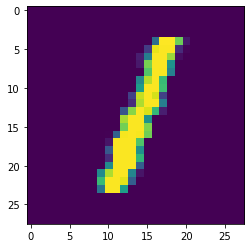

In [5]:
# verifying data
iter_var = iter(trainloader)
images, labels = iter_var.next()
plt.imshow(images[4].numpy().squeeze())
print(labels[4])

In [6]:
#building model
from collections import OrderedDict
model = nn.Sequential(OrderedDict([
          ('InputLayer',nn.Linear(784,128)),
          ('Relu1',nn.ReLU()),
          ('HiddenLayer',nn.Linear(128,64)),
          ('Relu2',nn.ReLU()),
          ('OutputLayer',nn.Linear(64,10)),
          ('Softmax',nn.Softmax(dim=1)),                    
]))

In [40]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [41]:
# training
epochs = 5
print_every = 100
running_loss = 0
step = 0
for e in range(epochs):
  for images, labels in trainloader:
    step += 1
    images.resize_(images.shape[0], 784)
    optimizer.zero_grad()
    output = model.forward(images)
    loss = criterion(output, labels)
    loss.backward()
    optimizer.step()
    running_loss+=loss.item()
    if step % print_every == 0:
      print('epocs {}/{} with running loss {}'.format(e+1,epochs,running_loss/print_every))
      running_loss = 0


epocs 1/5 with running loss 1.5215475475788116
epocs 1/5 with running loss 1.522088692188263
epocs 1/5 with running loss 1.5218338572978973
epocs 1/5 with running loss 1.5207372152805327
epocs 1/5 with running loss 1.5231573331356048
epocs 1/5 with running loss 1.5214116942882538
epocs 1/5 with running loss 1.5171041512489318
epocs 1/5 with running loss 1.524249793291092
epocs 1/5 with running loss 1.5193092346191406
epocs 2/5 with running loss 1.5190738224983216
epocs 2/5 with running loss 1.521481727361679
epocs 2/5 with running loss 1.5204598367214204
epocs 2/5 with running loss 1.5226190876960755
epocs 2/5 with running loss 1.519880405664444
epocs 2/5 with running loss 1.5178765118122102
epocs 2/5 with running loss 1.5151987397670745
epocs 2/5 with running loss 1.524444967508316
epocs 2/5 with running loss 1.5188373696804047
epocs 3/5 with running loss 1.5193113279342652
epocs 3/5 with running loss 1.5196504044532775
epocs 3/5 with running loss 1.519047212600708
epocs 3/5 with runn

In [51]:
temp = iter(testloader)
images, labels = temp.next()
with torch.no_grad():
  out = model.forward(images.resize_(images.shape[0],784))
ps= nn.functional.softmax(out,dim=1)
print("label - {}".format(labels))
equal = (labels.data == ps.max(1)[1])
accuracy = equal.type(torch.FloatTensor).mean()
print("Predictions - {}".format(ps.max(1)[1]))
print(accuracy)

label - tensor([2, 8, 6, 3, 3, 7, 8, 3, 3, 7, 4, 7, 8, 4, 6, 5, 7, 2, 0, 2, 8, 5, 1, 4,
        6, 8, 3, 3, 9, 3, 5, 7, 0, 0, 8, 3, 8, 2, 0, 6, 2, 9, 3, 8, 7, 1, 7, 7,
        8, 2, 0, 1, 6, 0, 1, 7, 0, 0, 1, 3, 2, 0, 7, 7])
Predictions - tensor([2, 1, 6, 7, 3, 7, 1, 3, 3, 7, 4, 7, 8, 4, 6, 5, 7, 2, 0, 2, 8, 5, 1, 4,
        5, 8, 3, 3, 9, 3, 5, 7, 0, 0, 8, 3, 8, 2, 0, 5, 2, 9, 3, 8, 2, 1, 7, 7,
        8, 2, 0, 1, 6, 0, 1, 2, 0, 0, 1, 3, 2, 0, 7, 7])
tensor(0.8906)


In [52]:
#testing data
print_every = 50
acc = 0
step = 0
for images, labels in testloader:
  step+=1
  images = images.resize_(images.shape[0],784)
  with torch.no_grad():
    output = model.forward(images)
  ps = nn.functional.softmax(output,dim=1)
  equal = (labels.data == ps.max(1)[1])
  acc += equal.type(torch.FloatTensor).mean()
  if step % print_every == 0:
    print("Accuracy - {} ".format(acc/print_every))
    acc = 0

Accuracy - 0.9378125071525574 
Accuracy - 0.9518749713897705 
Accuracy - 0.9440624713897705 


In [54]:
torch.save(model.state_dict(),'recognition.pth')
from google.colab import files
files.download('recognition.pth')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>